# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 9303 Павлов Дмитрий и Скворчевский Богдан

##### Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

В качестве временного ряда рассматривается дискретный сигнал с шагом дискретизации, равным единице.
Под полиномиальным сглаживанием понимается аппроксимация в смысле МНК значений конечного (нечетного) числа элементов сглаживаемого ряда полиномом заданного порядка с присвоением среднему из этих элементов значения сглаживающего полинома в центре выбранного временного отрезка. Такой подход соответствует так называемому сглаживанию в скользящем окне.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$.Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении пп. 1–4.

7. Сделать выводы.

## Выполнение работы

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math
import mplcyberpunk
plt.style.use("cyberpunk")

Пунки 1. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам.

Входной сигнал: $s(t)$
Выходной сигнал: $y(t) = A + Bt$.
Если осуществить приближение по МНК прямой линией по $m$ точкам, то необходимо минимизаировать следующее выражение для нечётных чисел:

$F(A, B) = \sum\limits_{k=-m}^{m} (s_k - y_k)^2 = \sum\limits_{k=-m}^{m} (s_k - A - Bk)^2 \Rightarrow min$

Переменными в этой задаче являются коэффициенты A и B прямой линии. Продифференцируем и приравняем к нулю, чтобы найти минимум. Посчитаем частные производные по A и B, получим:

$\begin{equation*}
 \begin{cases}
   {{\delta F(A, B)} \over {\delta A}} = 0\\
   {{\delta F(A, B)} \over {\delta B}} = 0\\
 \end{cases}
\end{equation*}$
$ \Leftrightarrow$
$\begin{equation*}
 \begin{cases}
   -2 \sum\limits_{k=-m}^{m} (s_k - A - Bk) = 0\\
   -2 \sum\limits_{k=-m}^{m} (ks_k - kA - Bk^2) = 0\\
 \end{cases}
\end{equation*}$
$ \Leftrightarrow$
$
 \begin{cases}
   -1\cdot \sum\limits_{k=-m}^{m} s_k + \sum\limits_{k=-m}^{m} A + \sum\limits_{k=-m}^{m} Bk = 0\\
   -1\cdot \sum\limits_{k=-m}^{m} ks_k + \sum\limits_{k=-m}^{m} kA + \sum\limits_{k=-m}^{m} Bk^2 = 0\\
   \end{cases}
$

Тогда система нормальных уравнений:

$\begin{equation*}
 \begin{cases}
   A = {1 \over {2m + 1}} \sum\limits_{k=-m}^{m} s_k \\
   B = {{\sum\limits_{k=-m}^{m} s_k} \over \sum\limits_{k=-m}^{m} k^2}
   \end{cases}
\end{equation*}$

В итоге получаем:

$y_0 = A = {1 \over {2m + 1}}\sum\limits_{k=-m}^{m} s_k = {1 \over {2m + 1}}\sum\limits_{k=-m}^{m} (s_{-m} + s_{-m+1} + ... + s_{m-1} + s_m)$

В общем случае:

$y_n = {1 \over {2m + 1}}\sum\limits_{k=-m}^{m} s_k = {1 \over {2m + 1}}\sum\limits_{k=-m}^{m} (s_{-m+n} + s_{-m+1+n} + ... + s_{m-1+n} + s_{m+n})$

$s_n = e^{i \omega n}$

$y_n = {1 \over {2m + 1}}\sum\limits_{k=-m}^{m} (e^{-m i \omega} + e^{(-m+1)i \omega} + ... + e^{(m-1)i \omega} + e^{m i \omega}) = H(\omega)$

$H(\omega) = {1 \over {2m + 1}}\sum\limits_{k=-m}^{m} (1 + 2\cos(\omega) + 2\cos(2\omega) + ... + 2\cos(m\omega))$

$H(\omega) = {{\sin({{(2m + 1)\omega} \over 2})} \over {(2m+1)\sin({\omega \over 2})}}$

$H(\omega) = H(2\pi f) = \tilde{H}(f)$

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по $k$ точкам:

$H_k(f) = {{\sin(k\pi f)} \over {k sin(\pi f)}}$

Построим графики $\tilde{H}(f)$:

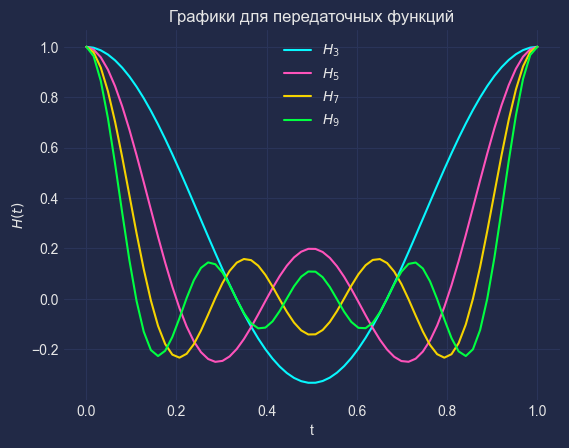

In [58]:
def h_k(k, f):
    return np.sin(k*math.pi*f)/(k*np.sin(f*math.pi))

f = np.linspace(0.001, 1.0, 64)
for k in range(3, 10, 2):
    plt.plot(f, h_k(k, f), label=r'$H_{}$'.format(k))
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
plt.title("Графики для передаточных функций")
plt.show()

Как мы можем наблюдать, за один период каждая из передаточных функций имеет ровно столько экстремумов, столько было использовано точек для ее построения, и, следовательно, чем больше экстремумов, тем больше колебаний. К тому же порядок гладкости увеличивается с увеличением количества точек для построения функции.

Пуник 2. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Переменными в этой задаче являются коэффициенты A и C прямой
линии. Продифференцируем и приравняем к нулю, чтобы найти минимум.
Посчитаем частные производные по A и C, получим:

Входной сигнал: $s(t)$
Выходной сигнал: $y(t) = A + Bt + Ct^2$.
Если осуществить приближение по МНК прямой линией по $m$ точкам, то необходимо минимизировать следующее выражение для нечётных чисел:

$F(A,B,C) = \sum\limits_{k=-m}^{m} (s_k - y_k)^2 = \sum\limits_{k=-m}^{m} (s_k - A - Bk - Ck^2)^2 \Rightarrow min$

Переменными в этой задаче являются коэффициенты A и C прямой линии. Продифференцируем и приравняем к нулю, чтобы найти минимум. Посчитаем частные производные по A и C, получим:

$\begin{equation*}
 \begin{cases}
   {{\delta F(A, B, C)} \over {\delta A}} = 0\\
   {{\delta F(A, B, C)} \over {\delta C}} = 0
 \end{cases}
\end{equation*}$
$\Leftrightarrow$
$\begin{equation*}
 \begin{cases}
   -2 \sum\limits_{k=-m}^{m} (s_k - A - Bk - Ck^2) = 0\\
   -2 \sum\limits_{k=-m}^{m} (k^2 s_k - k^2 A - Bk^3 - Ck^4) = 0
 \end{cases}
\end{equation*}$
$\Leftrightarrow$
$\begin{equation*}
 \begin{cases}
   -1\cdot \sum\limits_{k=-m}^{m} s_k + \sum\limits_{k=-m}^{m} A + \sum\limits_{k=-m}^{m} Bk + \sum\limits_{k=-m}^{m} Ck^2 = 0\\
   -1\cdot \sum\limits_{k=-m}^{m} k^2 s_k + \sum\limits_{k=-m}^{m} k^2 A + \sum\limits_{k=-m}^{m} Bk^3 + \sum\limits_{k=-m}^{m} Ck^4 = 0
   \end{cases}
\end{equation*}$

Тогда система нормальных уравнений:

$\begin{equation*}
 \begin{cases}
   (2m+1)A + {{m(m+1)(2m+1)} \over 3} C = \sum\limits_{k=-m}^{m} s_k \\
   {{m(m+1)(2m+1)} \over 3} A + {{m(m+1)(2m+1)(3m^2 + 3m - 1)} \over 15} C = \sum\limits_{k=-m}^{m} k^2 s_k
   \end{cases}
\end{equation*}$

Подставим ${{m(m+1)(2m+1)} \over 3} C$ во второе уравнение:

${{m(m+1)(2m+1)} \over 3} A + {{3m^2 + 3m - 1} \over 5} (\sum\limits_{k=-m}^{m} s_k - (2m+1)A) = \sum\limits_{k=-m}^{m} k^2 s_k \Leftrightarrow ({{m(m+1)(2m+1)} \over 3} - {{(3m^2 + 3m - 1)(2m + 1)} \over 5})A = \sum\limits_{k=-m}^{m} k^2 s_k - {{3m^2 + 3m - 1} \over 5} \sum\limits_{k=-m}^{m} s_k$

Тогда:

$A = {{\sum\limits_{k=-m}^{m} k^2 s_k - {{3m^2 + 3m - 1} \over 5} \sum\limits_{k=-m}^{m} s_k} \over {{{m(m+1)(2m+1)} \over 3} - {{(3m^2 + 3m - 1)(2m + 1)} \over 5}}}$

В итоге получаем:

$y_0 = A = {{\sum\limits_{k=-m}^{m} k^2 s_k - {{3m^2 + 3m - 1} \over 5} \sum\limits_{k=-m}^{m} s_k} \over {{{m(m+1)(2m+1)} \over 3} - {{(3m^2 + 3m - 1)(2m + 1)} \over 5}}}$

Для 7 точек:

$y_7 = A = {{\sum\limits_{k=-3}^{3} k^2 s_k - 7 \sum\limits_{k=-3}^{3} s_k} \over {28 - 49}} = {1 \over 21}(7 \sum\limits_{k=-3}^{3} s_k - \sum\limits_{k=-3}^{3} k^2 s_k) = {1 \over 21}(7s_{-3} + 7s_{-2} + 7s_{-1} + 7s_0 + 7s_1 + 7s_2 + 7s_3 - 9s_{-3} - 4s_{-2} - s_1 - 4s_2 - 9s_3) = {1 \over 21}(-2s_{-3} + 3s_{-2} + s_{-1} + 7s_0 + 6s_1 + 3s_2 + 2s_3)$

В общем случае:

$y_n = {1 \over 21}(-2s_{n-3} + 3s_{n-2} + s_{n-1} + 7s_n + 6s_{n+1} + 3s_{n+2} + 2s_{n+3})$

$s_n = e^{i \omega n}$

$y_n = {1 \over 21} (-2e^{-3i \omega} + 3e^{-2i \omega} + 6e^{-i \omega} + 7 + 6e^{i \omega} + 3e^{2i \omega} - 2e^{3i \omega}) e^{i\omega n} = H(\omega)e^{i\omega n}$

$H(\omega) = {1 \over 21} (-2e^{-3i \omega} + 3e^{-2i \omega} + 6e^{-i \omega} + 7 + 6e^{i \omega} + 3e^{2i \omega} - 2e^{3i \omega})$

$H(\omega) = {1 \over 21} (7 + 12\cos{\omega} + 6\cos{2\omega} - 4\cos{3\omega})$

$H(\omega) = H(2\pi f) = \tilde{H}(f)$

Формула для передаточной функции нерекурсивного фильтра, соотвутствующего сглаживанию полиномом второй степени по 7 точкам:

$H_7(f) = {1 \over 21}(7 + 12\cos(2\pi f) + 6\cos(4\pi f) - 4\cos(6\pi f))$

Аналогично посчитаем для 9, 11 и 13 точек:

$H_9(f) = {1 \over 231}(59 + 108\cos(2\pi f) + 78\cos(4\pi f) + 28\cos(6\pi f) - 42\cos(8\pi f))$

$H_{11}(f) = {1 \over 429}(89 + 168\cos(2\pi f) + 138\cos(4\pi f) + 88\cos(6\pi f) + 18\cos(8\pi f) - 72\cos(10\pi f))$

$H_{13}(f) = {1 \over 143}(25 + 48\cos(2\pi f) + 42\cos(4\pi f) + 32\cos(6\pi f) + 18\cos(8\pi f) - 22\cos(10\pi f))$

Построить графики $\tilde{H}(f)$:

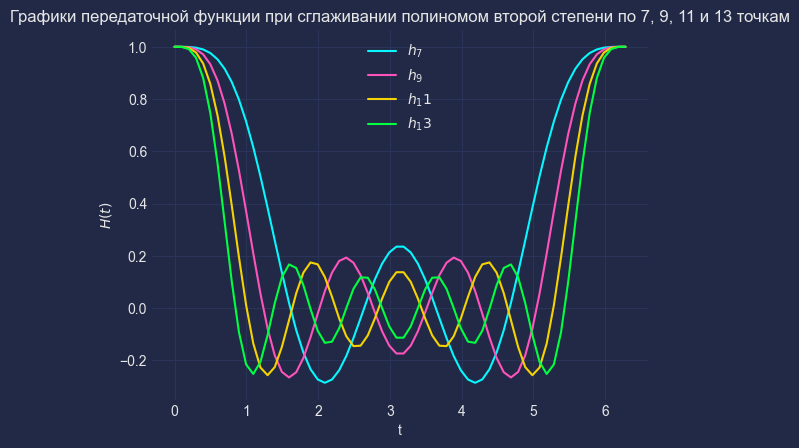

In [59]:
def h_7(x):
    return 1 / 21 * (7 + 12 * np.cos(x) + 6 * np.cos(2 * x) - 4 * np.cos(3 * x))
def h_9(x):
    return 1 / 231 * (59 + 108 * np.cos(x) + 78 * np.cos(2 * x) + 28 * np.cos(3 * x) - 42 * np.cos(4 * x))
def h_11(x):
    return 1 / 429 * (89 + 168 * np.cos(x) + 138 * np.cos(2 * x) + 88 * np.cos(3 * x) + 18 * np.cos(4 * x) - 72 * np.cos( 5 * x))
def h_13(x):
    return 1 / 143 * ( 25 + 48 * np.cos(x) + 42 * np.cos(2 * x) + 32 * np.cos(3 * x) + 18 * np.cos(4 * x) - 22 * np.cos(6 * x))

solves = [h_7, h_9, h_11, h_13]
t = np.linspace(0, 2 * math.pi, 64)
[plt.plot(t, solve(t), label=fr'${solve.__name__}$') for solve in solves]
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
plt.title("Графики передаточной функции при сглаживании полиномом второй степени по 7, 9, 11 и 13 точкам")
plt.show()

Из графика видно, что:
1. Передаточные функции для большего количество точек обладают большей частотой колебаний
2. Передаточные функции для большего количество точек быстрее уменьшаются в амплитуде с увеличением частоты сигнала
3. Окно частот, для которых почти не происходит приглушения, шире, чем при сглаживании прямой линией

Пункт 3. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам.

Входной сигнал: $s(t)$.

Выходной сигнал: $y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$.

Если осуществлять приближение по МНК прямой линией по $m$ точкам, то необходимо минимизировать следующее выражение для нечетных чисел:

$F(A, B, C) = \sum\limits^{m}_{k = -m} (s_k - y_k)^2 = \sum\limits^{m}_{k = -m} (s_k - A - Bk - Ck^2 + Dk^3 + Ek^4)^2 \rightarrow min$

Посчитаем частные производные по $A$, $C$ и $E$, получим:

$\begin{cases}
\dfrac{\delta F(A, B, C, D, E)}{\delta A} = 0\\
\dfrac{\delta F(A, B, C, D, E)}{\delta C} = 0\\
\dfrac{\delta F(A, B, C, D, E)}{\delta E} = 0\\
\end{cases}$
$\Leftrightarrow$
$\begin{cases}
-2 \sum\limits^{m}_{k = -m} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0\\
-2 \sum\limits^{m}_{k = -m} (k^2s_k - k^2A - Bk^3 - Ck^4 - Dk^5 - Ek^6) = 0\\
-2 \sum\limits^{m}_{k = -m} (k^4s_k - k^4A - Bk^5 - Ck^6 - Dk^7 - Ek^8) = 0\\
\end{cases}$
$\Leftrightarrow$
$\begin{cases}
-\sum\limits^{m}_{k = -m}s_k + \sum\limits^{m}_{k = -m}A + \sum\limits^{m}_{k = -m}Bk + \sum\limits^{m}_{k = -m}Ck^2 + \sum\limits^{m}_{k = -m}Dk^3 + \sum\limits^{m}_{k = -m}Ek^4 = 0\\
-\sum\limits^{m}_{k = -m}k^2s_k +\sum\limits^{m}_{k = -m}k^2A +\sum\limits^{m}_{k = -m} Bk^3 + \sum\limits^{m}_{k = -m}Ck^4 + \sum\limits^{m}_{k = -m} Dk^5 + \sum\limits^{m}_{k = -m}Ek^6 = 0\\
-\sum\limits^{m}_{k = -m}k^4s_k + \sum\limits^{m}_{k = -m} k^4A +\sum\limits^{m}_{k = -m} Bk^5 +\sum\limits^{m}_{k = -m} Ck^6 + \sum\limits^{m}_{k = -m} Dk^7 + \sum\limits^{m}_{k = -m}Ek^8 = 0\\
\end{cases}$
$\Leftrightarrow$
$\begin{cases}
-\sum\limits^{m}_{k = -m}s_k + \sum\limits^{m}_{k = -m}A  + \sum\limits^{m}_{k = -m}Ck^2 + \sum\limits^{m}_{k = -m}Ek^4 = 0\\
-\sum\limits^{m}_{k = -m}k^2s_k +\sum\limits^{m}_{k = -m}k^2A + \sum\limits^{m}_{k = -m}Ck^4 + \sum\limits^{m}_{k = -m}Ek^6 = 0\\
-\sum\limits^{m}_{k = -m}k^4s_k + \sum\limits^{m}_{k = -m} k^4A +\sum\limits^{m}_{k = -m} Ck^6 + \sum\limits^{m}_{k = -m}Ek^8 = 0\\
\end{cases}$

Система нормальных уравнений:

$\begin{cases}
(2m + 1)A + \dfrac{m(m + 1)(2m + 1)}{3}C + \dfrac{m(m + 1)(2m + 1)(3m^2 + 3m -1)}{15}F = \sum\limits^{m}_{k = -m}s_k\\
\dfrac{m(m + 1)(2m + 1)}{3}A + \dfrac{m(m + 1)(2m + 1)(3m^2 + 3m -1)}{15}C + \dfrac{m(m + 1)(2m + 1)(1 - 3m = 6m^3 + 3m^4)}{21}F = \sum\limits^{m}_{k = -m}k^2s_k\\
\dfrac{m(m + 1)(2m + 1)(3m^2 + 3m -1)}{15}A + \dfrac{m(m + 1)(2m + 1)(1 - 3m = 6m^3 + 3m^4)}{21}C + \dfrac{m(m + 1)(2m + 1)(-3 + 9m - m^2 - 15m^3 + 5m^4 + 15m^5 + 5m^6)}{45}F = \sum\limits^{m}_{k = -m}k^4s_k\\
\end{cases}$

Выразим $C$ из первого уравнения системы нормальных уравнении:

$C = \dfrac{-15A -30Am +Em -10Em^3 -15Em^4 - 6Em^5 - 15\sum^m_{k=-m}s_k}{5m(m+1)(2m+1)}$

Подставим теперь $C$ во второе и третье уравнение:

$\begin{cases}
\dfrac{(-3 -2m + 12m^2 + 8m^3)(-35A + 3Em(-2 -m +2m^2+m^3))}{525} + \dfrac{3m^2+3m -1}{5}\sum\limits^{m}_{k = -m}s_k = -\sum\limits^{m}_{k = -m}k^2s_k \\
\dfrac{(-3 -2m + 12m^2 + 8m^3)(3A(6m^2 + 6m -5) + Em(-6+m+12m^2+m^3-6m^4-2m^5))}{-315} + \dfrac{1-3m+6m^3+3m^4}{7}\sum\limits^{m}_{k = -m}s_k = -\sum\limits^{m}_{k = -m}k^4s_k \\
\end{cases}$

Выразим из 2 уравнения $E$ и подставим в 3 уравнение:

$\begin{cases}
E = 35\cdot\dfrac{A(-3 -2m + 12m^2 + 8m^3) + (3 - 9m -9m^2) \sum^m_{k = -m}s_k + 15 \sum^m_{k = -m}k^2s_k}{3m(-2-m+2m^2+m^3)(-3-2m+12m^2+8m^3)} \\
4A(45 + 18m -200m^2 - 80m^3 + 80 m^4 + 32m^5) - 15(12 - 50m - 35m^2 + 30m^3 + 15m^4) \sum\limits^{m}_{k = -m}s_k + 525(-3 + 2m + 2m^2) \sum\limits^{m}_{k = -m}k^2s_k = 945\cdot\sum\limits^{m}_{k = -m}k^4s_k
\end{cases}$

Выразим из 3 уравнения $A$:

$A = 15 \dfrac{(12 + 5m(1 + m)(-10 + 3m(1 + m)))\sum^m_{k = -m}s_k - 35(-3 +2m(1+m))\sum^m_{k = -m}k^2s_k - 63\sum^m_{k = -m}k^4s_k}{4(-3+2m)(-1+2m)(1+2m)(3 + 2m)(5 +2m)}$

В итоге получаем:

$y_0 = A = 15 \dfrac{(12 + 5m(1 + m)(-10 + 3m(1 + m)))\sum^m_{k = -m}s_k - 35(-3 +2m(1+m))\sum^m_{k = -m}k^2s_k - 63\sum^m_{k = -m}k^4s_k}{4(-3+2m)(-1+2m)(1+2m)(3 + 2m)(5 +2m)}$

Для 9 точек:

$y_9 = \dfrac{1}{429}(179\sum\limits^{m}_{k = -m}s_k - \dfrac{1}{4}(185\sum\limits^{m}_{k = -m}k^2s_k - 9\sum\limits^{m}_{k = -m}k^4s_k))$

$y_9 = \dfrac{1}{429}(15s_{-4} - 55s_{-3} + 30 s_{-2} + 135s_{-1} + 179s_{0} + 135s_{1} + 30s_{2} -55s_{3}+15s_{4})$

В общем случае:

$y_n = \dfrac{1}{429}(15s_{n-4} - 55s_{n-3} + 30 s_{n-2} + 135s_{n-1} + 179s_{n} + 135s_{n+1} + 30s_{n+2} -55s_{n+3}+15s_{n+4})$

$s_n = e^{i\omega n}$

$y_n = \dfrac{1}{429}(15e^{-4i\omega} - 55e^{-3i\omega} + 30 e^{-2i\omega} + 135e^{-i\omega} + 179 + 135e^{i\omega} + 30e^{2i\omega} -55e^{3i\omega}+15e^{4i\omega})e^{i\omega n} = H(\omega)e^{i\omega n}$

$H(\omega) = \dfrac{1}{429}(15e^{-4i\omega} - 55e^{-3i\omega} + 30 e^{-2i\omega} + 135e^{-i\omega} + 179 + 135e^{i\omega} + 30e^{2i\omega} -55e^{3i\omega}+15e^{4i\omega})$

$H(\omega) = \dfrac{1}{429}(179 + 270cos(\omega) + 60 cos(2\omega) - 110 cos(3\omega) + 30cos(4\omega))$

$H(\omega) = H(2\pi f) = \tilde{H}(f)$

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по 9 точкам:

$H_9(f) = \dfrac{1}{429}(179 + 270 cos(2\pi f) + 60 cos(4\pi f) − 110 cos(6\pi f)+ 30 cos(8\pi f))$

Аналогично посчитаем для 11, 13, 15 точек.

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по 11 точкам:

$H_11(f) = \dfrac{1}{429}(143 + 240 cos(2\pi f) + 120 cos(4\pi f) − 20 cos(6\pi f) - 90 cos(8\pi f) + 36 cos(10\pi f))$

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по 13 точкам:

$H_13(f) = \dfrac{1}{2434}(677 + 1200 cos(2\pi f) + 780 cos(4\pi f) + 220 cos(6\pi f) - 270 cos(8\pi f) - 396 cos(10\pi f) + 220cos(12\pi f))$

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по 15 точкам:

$H_15(f) = \dfrac{1}{46189}(11063 + 20250 cos(2\pi f) + 15000 cos(4\pi f)+ 7510 cos(6 \pi f) − 330 cos(8\pi f) − 5874 cos(10\pi f) + 5720 cos(12\pi f) + 4290 cos(14\pi f))$

Построим графики $\tilde{H}(f)$:

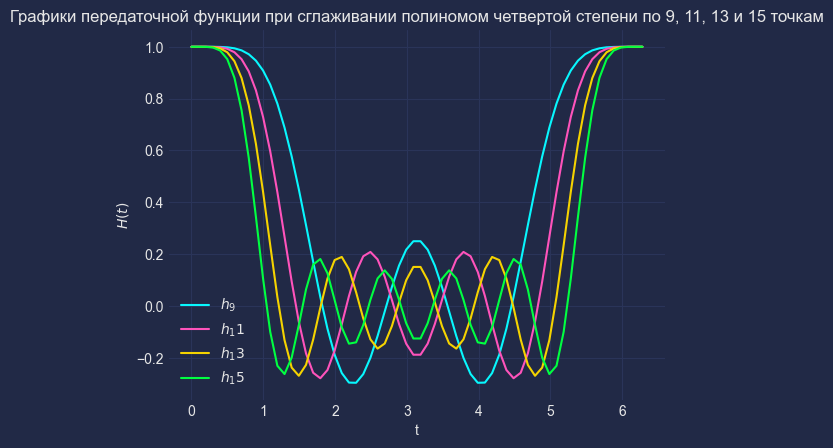

In [60]:
def h_9(x):
    return 1 / 429 * (179 + 270 * np.cos(x) + 60 * np.cos(2 * x) - 110 * np.cos(3 * x) + 30 * np.cos(4 * x))

def h_11(x):
    return 1 / 429 * (143 + 240 * np.cos(x) + 120 * np.cos(2 * x) - 20 * np.cos(3 * x) - 90 * np.cos(4 * x) +
                            36 * np.cos(5 * x))

def h_13(x):
    return 1 / 2431 * (677 + 1200 * np.cos(x) + 780 * np.cos(2 * x) + 220 * np.cos(3 * x) - 270 * np.cos(4 * x) -
                             396 * np.cos(5 * x) + 220 * np.cos(6 * x))
def h_15(x):
    return 1 / 46189 * (11063 + 20250 * np.cos(x) + 15000 * np.cos(2 * x) + 7510 * np.cos(3 * x) - 330 * np.cos(4 * x) -
                        5874 * np.cos(5 * x) - 5720 * np.cos(6 * x) + 4290 * np.cos(7 * x))
t = np.linspace(0, 2 * math.pi, 64)
solves = [h_9, h_11, h_13, h_15]

[plt.plot(t, solve(t), label=fr'${solve.__name__}$') for solve in solves]
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
plt.title("Графики передаточной функции при сглаживании полиномом четвертой степени по 9, 11, 13 и 15 точкам")
plt.show()

Из графика видно, что:
1. Передаточные функции для большего количество точек обладают большей частотой колебаний
2. Передаточные функции для большего количество точек быстрее уменьшаются в амплитуде с увеличением частоты сигнала
3. Окно частот, для которых почти не происходит приглушения, шире, чем при использовании фильтра, соответствующего сглаживанию полиномом второго порядка

Пункт 4. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам.

$y_n = {1 \over 320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} - 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

$y_n = {1 \over 350}(-s_{n-10} - 3s_{n-6} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} -5s_{n+8} -3s_{n+9} - s_{n+10})$

Соответствующие передаточные функции:

$H_{15}(f) = {1 \over 320}(74 + 134\cos(2\pi f) + 92\cos(4\pi f) + 42\cos(6\pi f) + 6\cos(8\pi f) - 10\cos(10\pi f) - 12\cos(12\pi f) - 6\cos(14\pi f))$

$H_{21}(f) = {1 \over 350}(60 + 114\cos(2\pi f) + 94\cos(4\pi f) + 66\cos(6\pi f) + 36\cos(8\pi f) + 12\cos(10\pi f) - 4\cos(12\pi f) - 10\cos(14\pi f) - 10\cos(16\pi f) - 6\cos(18\pi f) - 2\cos(20\pi f))$

Построим графики $\tilde{H}(f)$:

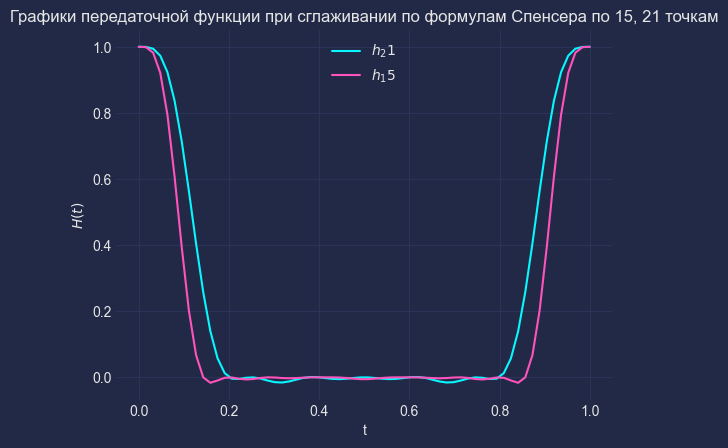

In [61]:
def h_21(x):
    return 1/320 * (74 + 134*np.cos(2*math.pi*x) + 92*np.cos(4*math.pi*x) + 42*np.cos(6*math.pi*x) +
                          6*np.cos(8*math.pi*x) - 10*np.cos(10*math.pi*x) - 12*np.cos(12*math.pi*x) - 6*np.cos(14*math.pi*x))

def h_15(x):
    return 1/350 * (60 + 114*np.cos(2*math.pi*x) + 94*np.cos(4*math.pi*x) + 66*np.cos(6*math.pi*x) +
                          36*np.cos(8*math.pi*x) + 12*np.cos(10*math.pi*x) - 4*np.cos(12*math.pi*x) - 10*np.cos(14*math.pi*x) -
                          10*np.cos(16*math.pi*x) - 6*np.cos(18*math.pi*x) - 2*np.cos(20*math.pi*x))
t = np.linspace(0, 1, 64)
solves=[h_21, h_15]
[plt.plot(t, solve(t), label=fr'${solve.__name__}$') for solve in solves]
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
plt.title("Графики передаточной функции при сглаживании по формулам Спенсера по 15, 21 точкам")
plt.show()

Из графика видно, что:
1. Передаточная функция для 21-точечной формулы обладает большей частотой колебаний
2. Передаточная функция для 21-точечной формулы быстрее уменьшаются в амплитуде с увеличением частоты сигнала
3. По сравнению с передаточными функциями из п.1-п.3 уменьшение амплитуды происходит гораздо быстрее при превышении оптимальной частоты

Пункт 5. Построим графики из предыдущих пунктов в логарифмической шкале (Дб).

Кривые, построенные ранее, недостаточно информативны, так как значения на высоких частотах настолько малы, что невозможно решить насколько они хороши. Поэтому лучше использовать логарифмы чисел $H(\omega)$. Для этой цели используются децибелы:

Значение в Дб: $20 lg({{y_n} \over {s_n}})$

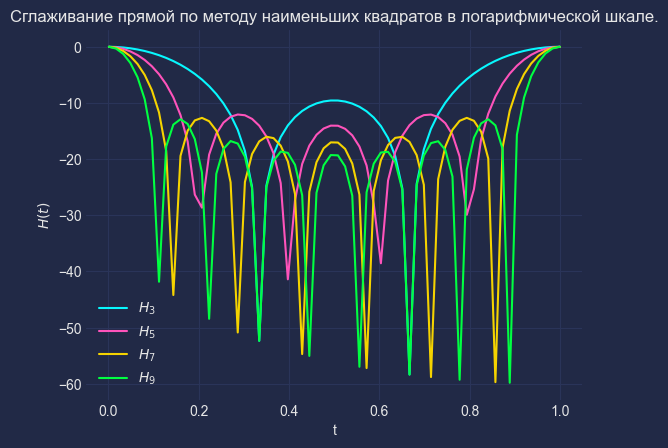

In [62]:
f = np.linspace(0.001, 1.0, 64)
for k in range(3, 10, 2):
    plt.plot(f, 20*np.log10(np.abs(h_k(k, f))), label=r'$H_{}$'.format(k))
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
plt.title("Сглаживание прямой по методу наименьших квадратов в логарифмической шкале.")
plt.show()

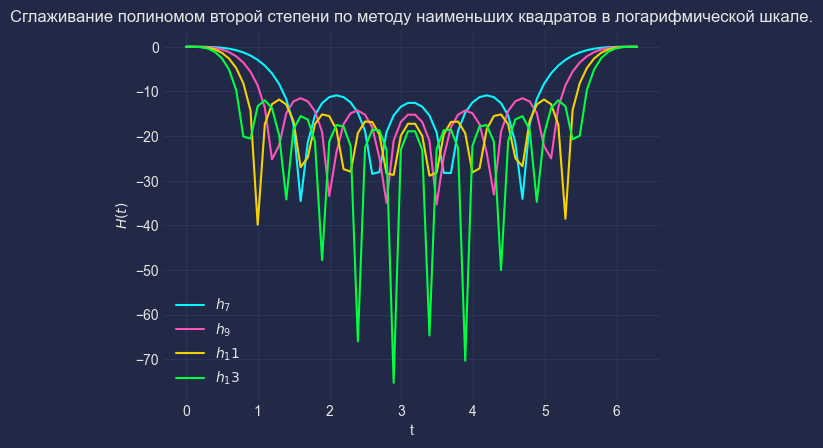

In [63]:
def h_7(x):
    return 1 / 21 * (7 + 12 * np.cos(x) + 6 * np.cos(2 * x) - 4 * np.cos(3 * x))

def h_9(x):
    return 1 / 231 * (59 + 108 * np.cos(x) + 78 * np.cos(2 * x) + 28 * np.cos(3 * x) - 42 * np.cos(4 * x))

def h_11(x):
    return 1 / 429 * (89 + 168 * np.cos(x) + 138 * np.cos(2 * x) + 88 * np.cos(3 * x) + 18 * np.cos(4 * x) -
                            72 * np.cos( 5 * x))

def h_13(x):
    return 1 / 143 * ( 25 + 48 * np.cos(x) + 42 * np.cos(2 * x) + 32 * np.cos(3 * x) + 18 * np.cos(4 * x) -
                            22 * np.cos(6 * x))
t = np.linspace(0.001, 2*math.pi, 64)
solves = [h_7, h_9, h_11, h_13]
[plt.plot(t, 20*np.log10(np.abs(solve(t))), label=fr'${solve.__name__}$') for solve in solves]
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
plt.title("Сглаживание полиномом второй степени по методу наименьших квадратов в логарифмической шкале.")
plt.show()

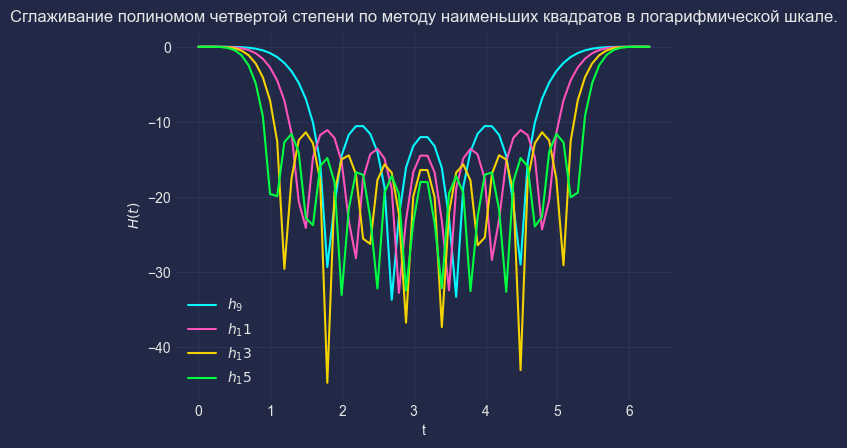

In [64]:
def h_9(x):
    return 1 / 429 * (179 + 270 * np.cos(x) + 60 * np.cos(2 * x) - 110 * np.cos(3 * x) + 30 * np.cos(4 * x))

def h_11(x):
    return 1 / 429 * (143 + 240 * np.cos(x) + 120 * np.cos(2 * x) - 20 * np.cos(3 * x) - 90 * np.cos(4 * x) +
                            36 * np.cos(5 * x))

def h_13(x):
    return 1 / 2431 * (677 + 1200 * np.cos(x) + 780 * np.cos(2 * x) + 220 * np.cos(3 * x) -
                             270 * np.cos(4 * x) - 396 * np.cos(5 * x) + 220 * np.cos(6 * x))

def h_15(x):
    return 1 / 46189 * (11063 + 20250 * np.cos(x) + 15000 * np.cos(2 * x) + 7510 * np.cos(3 * x) -
                              330 * np.cos(4 * x) - 5874 * np.cos(5 * x) - 5720 * np.cos(6 * x) + 4290 * np.cos(7 * x))
t = np.linspace(0.001, 2*math.pi, 64)
solves = [h_9, h_11, h_13, h_15]
[plt.plot(t, 20*np.log10(np.abs(solve(t))), label=fr'${solve.__name__}$') for solve in solves]
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
plt.title("Сглаживание полиномом четвертой степени по методу наименьших квадратов в логарифмической шкале.")
plt.show()

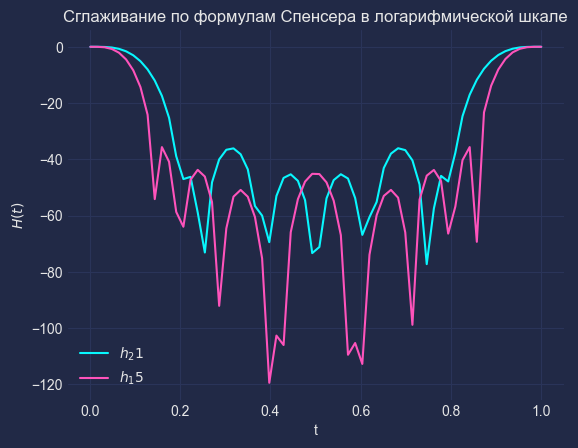

In [65]:
def h_21(x):
    return 1 / 320 * (74 + 134 * np.cos(2 * math.pi * x) + 92 * np.cos(4 * math.pi * x) + 42 * np.cos(6 * math.pi * x) +
                            6 * np.cos(8 * math.pi * x) - 10 * np.cos(10 * math.pi * x) - 12 * np.cos(12 * math.pi * x) -
                            6 * np.cos(14 * math.pi * x))

def h_15(x):
    return 1 / 350 * (60 + 114 * np.cos(2 * math.pi * x) + 94 * np.cos(4 * math.pi * x) +
                            66 * np.cos( 6 * math.pi * x) + 36 * np.cos(8 * math.pi * x) + 12 * np.cos(10 * math.pi * x) -
                            4 * np.cos(12 * math.pi * x) - 10 * np.cos(14 * math.pi * x) - 10 * np.cos(16 * math.pi * x) -
                            6 * np.cos(18 * math.pi * x) - 2 * np.cos(20 * math.pi * x))
t = np.linspace(0.001, 1, 64)
solves=[h_21, h_15]
[plt.plot(t, 20*np.log10(np.abs(solve(t))), label=fr'${solve.__name__}$') for solve in solves]
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
plt.title("Сглаживание по формулам Спенсера в логарифмической шкале")
plt.show()

Графики на позволяют сделать заключение о том, что шум является высокочастотным, а сигнал низкочастотным. Теперь ясно, что
формулы сглаживания пропускают одни частоты, а другие устраняют.

Пункт 6. Проведем сопоставительный анализ свойств передаточных функций, полученных при выполнении пп. 1-4.

1) Увеличение степени полинома, который используется для сглаживания, приводит к увеличению размера окна низких частот, для которых почти не происходит приглушения входного сигнала

2) Увеличение количества используемых точек приводит к тому, что кривые передаточных функций спадают более резко

3) При использовании фильтра, соответствующего сглаживанию по формулам Спенсера, уменьшение амплитуды происходит гораздо быстрее, чем при использовании других смоделированных фильров

## Выводы

В ходе выполнения лабораторной работы был проведён анализ частотных характеристик известных формул полиномиального сглаживания временных рядов. Были построены соответствующие графики.